### Decision Tree Classification


In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('iris.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

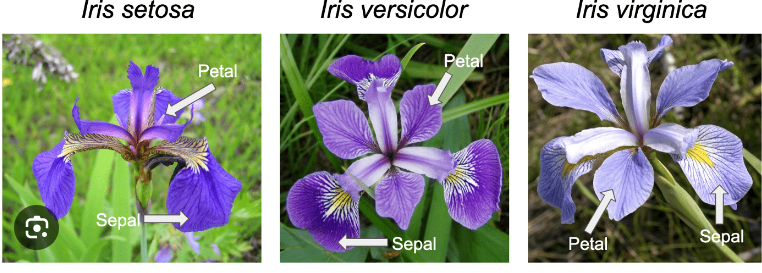

In [8]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Preprocessing

### Seperate X and Y

In [9]:
x= df.drop(columns=['species'],axis=1)
y= df[['species']]

In [10]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


### Label encode the target feature

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y['species']= le.fit_transform(y['species'])

In [13]:
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


### Perform Pipeline for X feature

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [15]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())])

In [17]:
xpre= num_pipe.fit_transform(x)
xpre[0:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [19]:
cols = num_pipe.get_feature_names_out()
cols

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [20]:
x_pre = pd.DataFrame(xpre, columns=cols)
x_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### Train Test Split

In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y, test_size= 0.2, random_state= 65 )

### Build decision Trees

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier() # Here we have created a blank model bt we can give prams here also.
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [23]:
# Evaluation for training
dtc.score(xtrain,ytrain)

1.0

In [24]:
# Evaluation for testing 
dtc.score(xtest,ytest)

0.9666666666666667

### Tune Hyperparameters
1. max_depth
2. min_samples_split
3. min_samples_leaf
4. criterion(gini, entropy)

In [33]:
params = {'max_depth': [2,3,4,5,6],
          'min_samples_split':[4,5,6,7,8],
          'criterion':['gini','entropy']}
## Here we can tune params more than 3 bt we have tune only 3 params to get more accuracy. Always tune 3 or less than 3 prams. 

In [34]:
from sklearn.model_selection import GridSearchCV
model= DecisionTreeClassifier(random_state=42)
gscv = GridSearchCV(model, param_grid= params,cv=5,scoring= 'f1_macro')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_split': [4, 5, 6, 7, 8]},
             scoring='f1_macro')

In [35]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 4}

In [36]:
gscv.best_score_

0.9422953625894802

In [38]:
best_dtc = gscv.best_estimator_
best_dtc

DecisionTreeClassifier(max_depth=2, min_samples_split=4, random_state=42)

In [39]:
best_dtc.score(xtrain,ytrain)

0.9666666666666667

In [40]:
best_dtc.score(xtest,ytest)

0.8666666666666667

### Visualize how tree is built

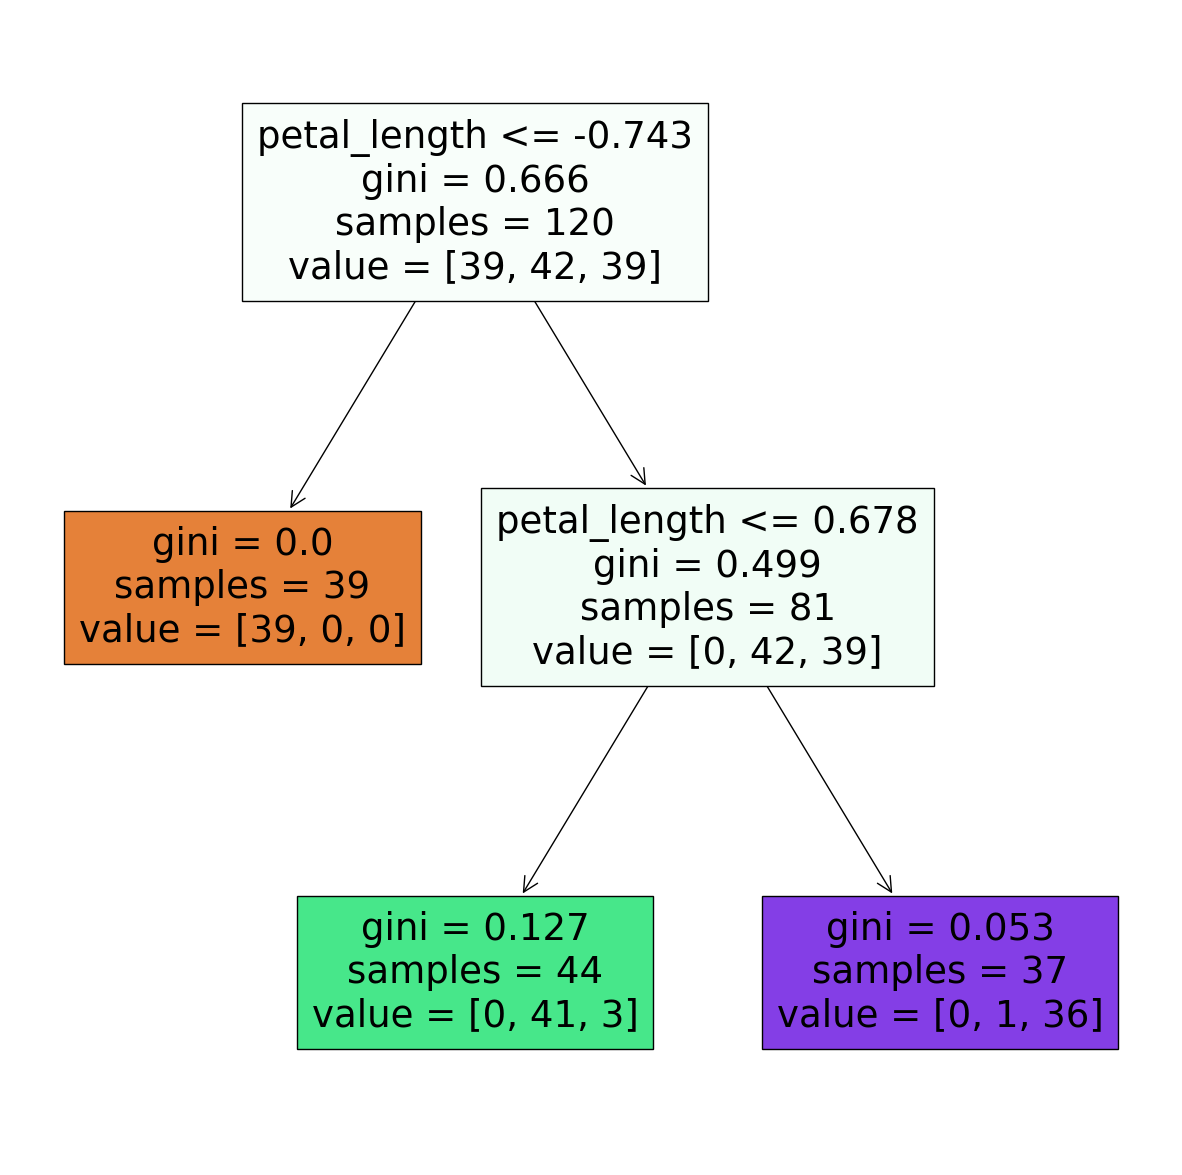

In [43]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
plot_tree(best_dtc, filled= True, feature_names=list(xtrain.columns))
plt.show()
# Here value =[39,42,39] is value counts for satosa,versicolor and virginica

In [42]:
ytrain.value_counts()

species
1          42
0          39
2          39
Name: count, dtype: int64

### Evaluate best model for test data

In [44]:
# Predict the value count for train and test
ypred_tr = best_dtc.predict(xtrain)
ypred_ts = best_dtc.predict(xtest)

In [45]:
ypred_tr

array([1, 2, 0, 1, 1, 1, 2, 0, 2, 2, 0, 0, 1, 1, 0, 2, 2, 2, 0, 0, 1, 1,
       0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 1, 2, 2, 1, 1, 0, 0, 1, 0, 2,
       2, 1, 0, 0, 1, 0, 2, 0, 1, 1, 1, 1, 2, 2, 1, 2, 2, 0, 2, 0, 0, 1,
       1, 1, 0, 2, 2, 1, 0, 1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 1, 0, 1, 2, 2,
       0, 0, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 0, 2, 1, 1, 1, 2, 0, 2, 2,
       1, 2, 0, 2, 0, 1, 0, 1, 2, 0])

In [46]:
ypred_ts

array([1, 1, 0, 1, 0, 2, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 1, 2, 1, 1, 2, 2,
       1, 2, 0, 2, 0, 2, 1, 0])

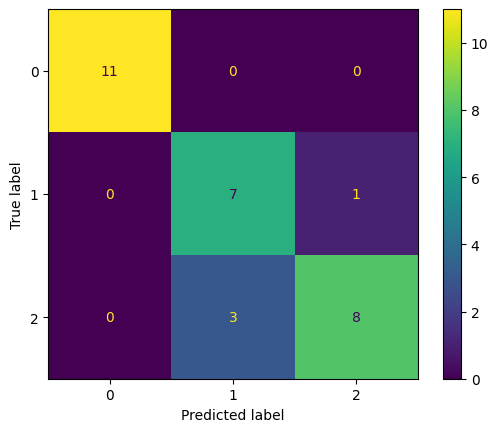

In [50]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels= best_dtc.classes_)
cfd.plot()

In [51]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.70      0.88      0.78         8
           2       0.89      0.73      0.80        11

    accuracy                           0.87        30
   macro avg       0.86      0.87      0.86        30
weighted avg       0.88      0.87      0.87        30



### Getting the original labels

In [54]:
ypred_tr_lb = le.inverse_transform(ypred_tr)
ypred_ts_lb = le.inverse_transform(ypred_ts)

In [55]:
ypred_tr_lb

array(['versicolor', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'virginica',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'setosa', 'virginica', 'setosa', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'setosa', 'virginica', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'virginica',
       'virginica', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor

In [56]:
ypred_ts_lb

array(['versicolor', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'virginica', 'setosa', 'virginica',
       'setosa', 'virginica', 'versicolor', 'setosa'], dtype=object)

### Feature importance

In [58]:
imp = best_dtc.feature_importances_
imp = pd.Series(imp)
imp.index = xtrain.columns
imp = imp.sort_values(ascending= False)
imp

petal_length    1.0
sepal_length    0.0
sepal_width     0.0
petal_width     0.0
dtype: float64

<Axes: title={'center': 'Feature Importances'}>

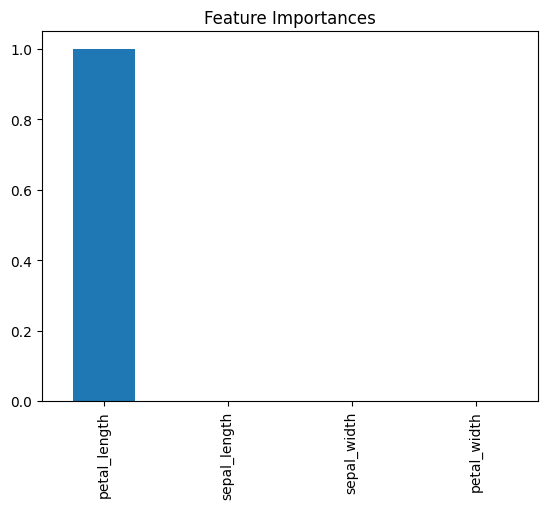

In [59]:
imp.plot(kind= 'bar', title= 'Feature Importances')